<a href="https://colab.research.google.com/github/Gehlen05/Aprendizado-Maquina/blob/main/previsao_uso_bicicletas_alugadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Previsão do uso de bicicletas alugadas.
Exercício de aprendizado.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
bike = pd.read_csv('/content/bike-sharing-daily.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [ ]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
bike = bike.drop(labels=['instant'], axis = 1)

In [ ]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


Transformar a data em datetime e logo após usar ela como index

In [ ]:
bike.dteday = pd.to_datetime(bike.dteday, format = "%m/%d/%Y")

In [ ]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [ ]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [ ]:
bike.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


Visualizar os dados

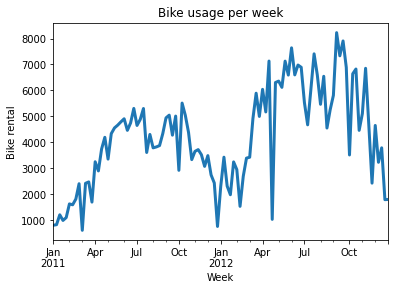

In [ ]:
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike rental');

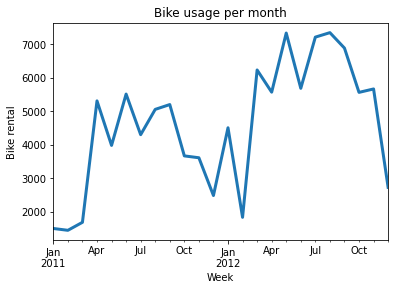

In [ ]:
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Bike usage per month')
plt.xlabel('Week')
plt.ylabel('Bike rental');

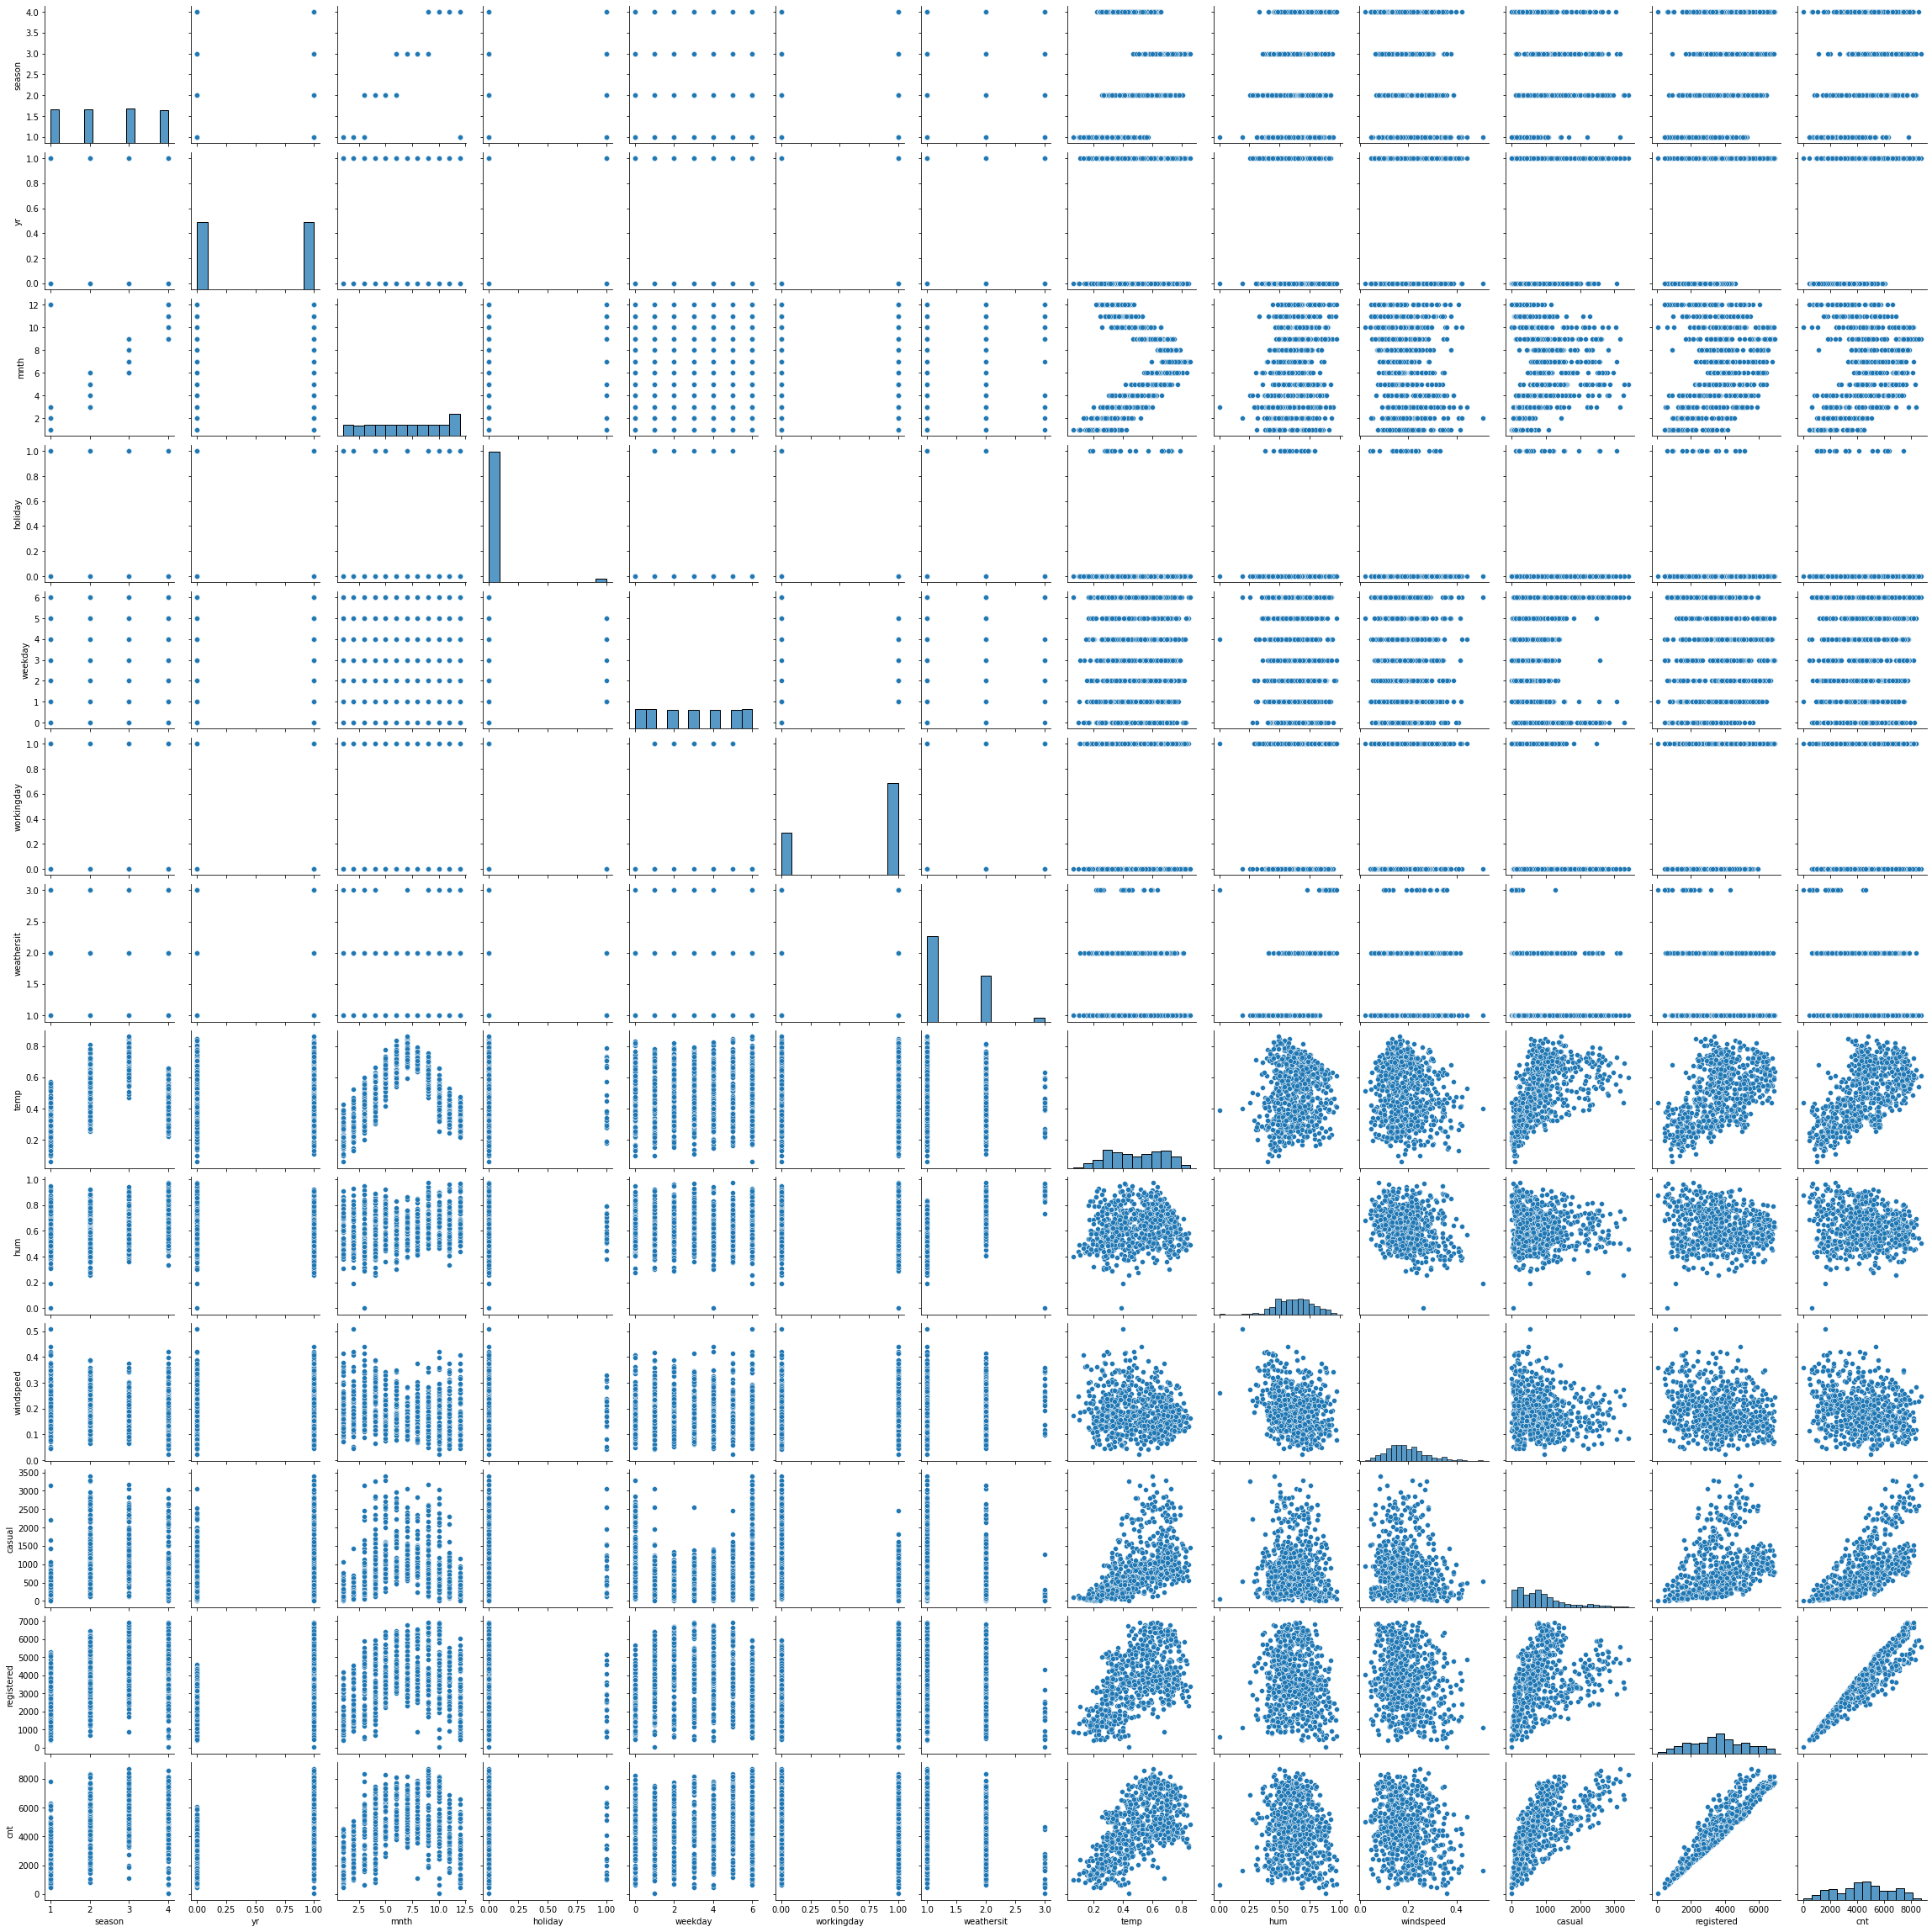

In [ ]:
sns.pairplot(bike);

Separar as colunas numéricas e análisar. 

In [ ]:
X_numerico = bike[['temp', 'hum', 'windspeed', 'cnt']]

In [ ]:
X_numerico.head(5)

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


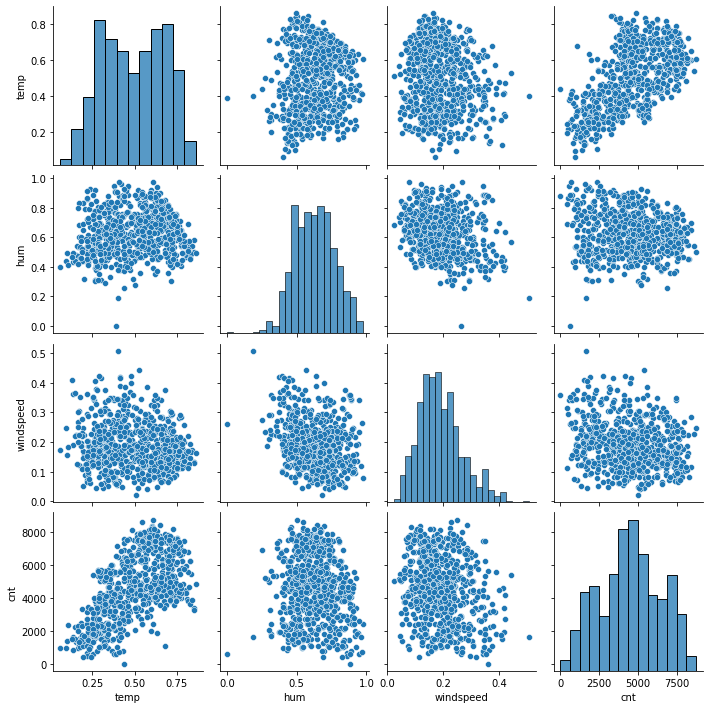

In [ ]:
sns.pairplot(X_numerico);

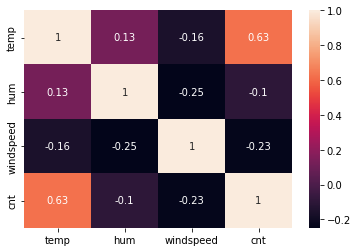

In [ ]:
sns.heatmap(X_numerico.corr(), annot = True)

Tratar dados da base.

In [ ]:
X_data = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [ ]:
X_data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_data = onehotencoder.fit_transform(X_data).toarray()

In [ ]:
X_data

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
X_data.shape

(731, 32)

In [ ]:
X_data = pd.DataFrame(X_data)

In [ ]:
X_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
X_numerico = X_numerico.reset_index()

In [ ]:
X_numerico.head()

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600


In [ ]:
X_all = pd.concat([X_data, X_numerico], axis = 1)

In [ ]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [ ]:
X_all = X_all.drop(labels=['dteday'], axis = 1)

In [ ]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


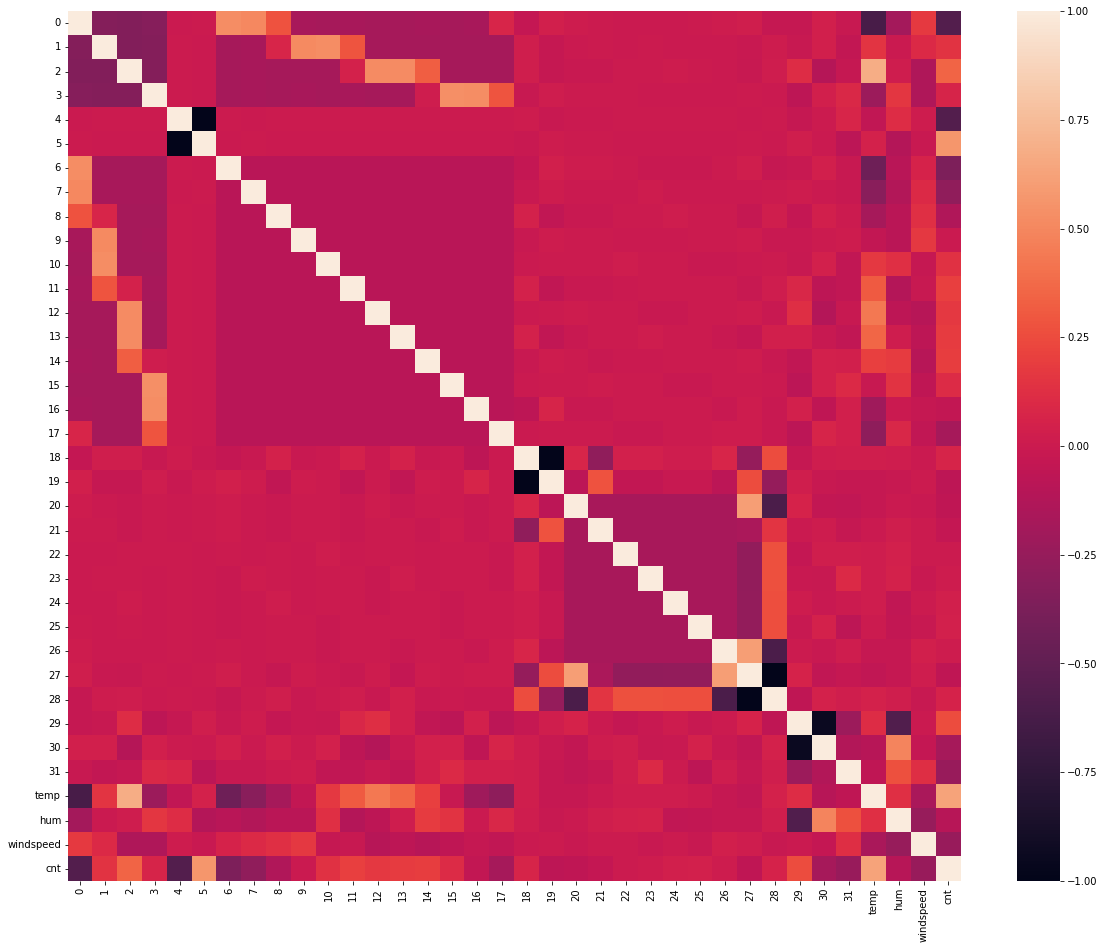

In [ ]:
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(X_all.corr())

In [ ]:
X = X_all.iloc[:, :-1].values

In [ ]:
y = X_all.iloc[:, -1:].values

In [ ]:
X.shape

(731, 35)

In [ ]:
y.shape

(731, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(584, 35)

In [ ]:
X_test.shape

(147, 35)

In [ ]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(35,)))
modelo.add(tf.keras.layers.Dense(units = 100, activation='relu'))
modelo.add(tf.keras.layers.Dense(units = 100, activation='relu'))
modelo.add(tf.keras.layers.Dense(units = 1, activation='linear'))

In [ ]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               3600      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epocas = modelo.fit(X_train, y_train, epochs = 10, batch_size = 50, validation_split=0.2)

Epoch 1/10
10/10 [==============================] - 2s 143ms/step - loss: 0.1176 - val_loss: 0.0396
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0353 - val_loss: 0.0213
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 0.0170 - val_loss: 0.0243
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 0.0112 - val_loss: 0.0155
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0095 - val_loss: 0.0168
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0078 - val_loss: 0.0144
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0068 - val_loss: 0.0132
Epoch 8/10
10/10 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.0147
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0135
Epoch 10/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.0126


In [ ]:
epocas.history.keys()

dict_keys(['loss', 'val_loss'])

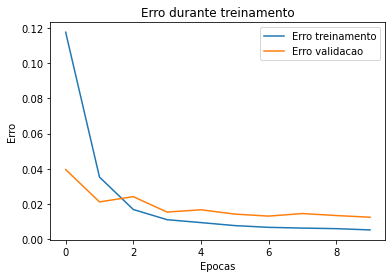

In [ ]:
plt.plot(epocas.history['loss'])
plt.plot(epocas.history['val_loss'])
plt.title('Erro durante treinamento')
plt.xlabel('Epocas')
plt.ylabel('Erro')
plt.legend(['Erro treinamento', 'Erro validacao']);

In [ ]:
y_predito = modelo.predict(X_test)

5/5 [==============================] - 0s 3ms/step


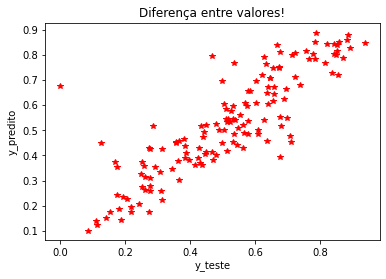

In [ ]:
plt.plot(y_test, y_predito, "*", color='red')
plt.title('Diferença entre valores!')
plt.xlabel('y_teste')
plt.ylabel('y_predito');

In [ ]:
y_predito_original = scaler.inverse_transform(y_predito)
y_test_original = scaler.inverse_transform(y_test)

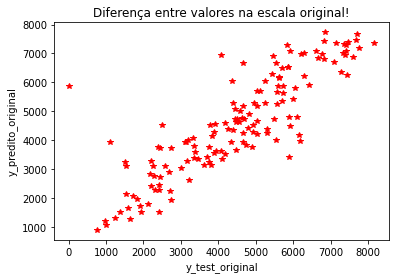

In [ ]:
plt.plot(y_test_original, y_predito_original, "*", color='red')
plt.title('Diferença entre valores na escala original!')
plt.xlabel('y_test_original')
plt.ylabel('y_predito_original');

In [ ]:
k = X_test
n = len(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
mae = mean_absolute_error(y_test_original, y_predito_original)
mse = mean_squared_error(y_test_original, y_predito_original)
rmse = sqrt(mse)
r2 = r2_score(y_test_original, y_predito_original)
adj_r2 = 1 - (1- r2) / (n - k -1)

In [ ]:
print("mae = ", mae)
print("mse = ", mse)
print("rmse = ", rmse)
print("r2 = ", r2)
print("r2 ajustado = ", adj_r2)

mae =  652.8889006530346
mse =  920548.4429595146
rmse =  959.4521577231011
r2 =  0.7266546706005923
r2 ajustado =  [[0.99812777 0.99811486 0.99812777 ... 0.99811901 0.99812143 0.99812526]
 [0.99811486 0.99812777 0.99812777 ... 0.99812055 0.99811735 0.99812622]
 [0.99812777 0.99811486 0.99812777 ... 0.99811841 0.99812084 0.99812606]
 ...
 [0.99811486 0.99812777 0.99812777 ... 0.99812701 0.99812263 0.99812556]
 [0.99811486 0.99812777 0.99812777 ... 0.99812425 0.99811684 0.99812609]
 [0.99812777 0.99812777 0.99811486 ... 0.99811792 0.99812021 0.99812561]]
